The aim of this R project is to build a classifier that can detect credit card fraudulent transactions. We will use a variety of machine learning algorithms that will be able to discern fraudulent from non-fraudulent one. By the end of this machine learning project, you will learn how to implement machine learning algorithms to perform classification.

>Tujuan dari proyek R ini adalah untuk membangun classifier yang dapat mendeteksi transaksi penipuan kartu kredit. Kami akan menggunakan berbagai algoritma pembelajaran mesin yang akan dapat membedakan penipuan dari yang tidak curang. Pada akhir proyek pembelajaran mesin ini, Anda akan belajar bagaimana menerapkan algoritma pembelajaran mesin untuk melakukan klasifikasi.

# 1. Importing the Datasets

> #1. Mengimpor Dataset

We are importing the datasets that contain transactions made by credit cards

> Kami mengimpor kumpulan data yang berisi transaksi yang dilakukan dengan kartu kredit

In [1]:
library(ranger)
library(caret)
library(data.table)
creditcard_data <- read.csv("creditcard.csv")

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 2. Data Exploration

> #2. Eksplorasi Data

In this section of the fraud detection ML project, we will explore the data that is contained in the creditcard_data dataframe. We will proceed by displaying the creditcard_data using the head() function as well as the tail() function. We will then proceed to explore the other components of this dataframe

>Di bagian proyek ML deteksi penipuan ini, kami akan menjelajahi data yang terdapat dalam kerangka data creditcard_data. Kami akan melanjutkan dengan menampilkan creditcard_data menggunakan fungsi head() serta fungsi tail (). Kami kemudian akan melanjutkan untuk mengeksplorasi komponen lain dari dataframe ini

In [2]:
dim(creditcard_data)
head(creditcard_data, 6)

[1] 284807     31

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [3]:
tail(creditcard_data, 6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172785,0.1203164,0.93100513,-0.5460121,-0.7450968,1.13031398,-0.2359732,0.8127221,0.1150929,-0.2040635,...,-0.3142046,-0.8085204,0.05034266,0.102799590,-0.4358701,0.1240789,0.217939865,0.06880333,2.69,0
284803,172786,-11.8811179,10.07178497,-9.8347835,-2.0666557,-5.36447278,-2.6068373,-4.9182154,7.3053340,1.9144283,...,0.2134541,0.1118637,1.01447990,-0.509348453,1.4368069,0.2500343,0.943651172,0.82373096,0.77,0
284804,172787,-0.7327887,-0.05508049,2.0350297,-0.7385886,0.86822940,1.0584153,0.0243297,0.2948687,0.5848000,...,0.2142053,0.9243836,0.01246304,-1.016225669,-0.6066240,-0.3952551,0.068472470,-0.05352739,24.79,0
284805,172788,1.9195650,-0.30125385,-3.2496398,-0.5578281,2.63051512,3.0312601,-0.2968265,0.7084172,0.4324540,...,0.2320450,0.5782290,-0.03750086,0.640133881,0.2657455,-0.0873706,0.004454772,-0.02656083,67.88,0
284806,172788,-0.2404400,0.53048251,0.7025102,0.6897992,-0.37796113,0.6237077,-0.6861800,0.6791455,0.3920867,...,0.2652449,0.8000487,-0.16329794,0.123205244,-0.5691589,0.5466685,0.108820735,0.10453282,10.00,0
284807,172792,-0.5334125,-0.18973334,0.7033374,-0.5062712,-0.01254568,-0.6496167,1.5770063,-0.4146504,0.4861795,...,0.2610573,0.6430784,0.37677701,0.008797379,-0.4736487,-0.8182671,-0.002415309,0.01364891,217.00,0


In [4]:
table(creditcard_data$Class)
summary(creditcard_data$Amount)
names(creditcard_data)
var(creditcard_data$Amount)


     0      1 
284315    492 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

[1] 62560.07

In [5]:
sd(creditcard_data$Amount)

[1] 250.1201

# 3. Data Manipulation

> #3. Manipulasi Data

In this section of the R data science project, we will scale our data using the scale() function. We will apply this to the amount component of our creditcard_data amount. Scaling is also known as feature standardization. With the help of scaling, the data is structured according to a specified range. Therefore, there are no extreme values in our dataset that might interfere with the functioning of our model. We will carry this out as follows:

>Di bagian proyek R data science ini, kami akan menskalakan data kami menggunakan fungsi scale (). Kami akan menerapkan ini ke komponen jumlah dari jumlah creditcard_data kami. Scaling juga dikenal sebagai standardisasi fitur. Dengan bantuan penskalaan, data disusun menurut rentang yang ditentukan. Oleh karena itu, tidak ada nilai ekstrem dalam kumpulan data kami yang dapat mengganggu fungsi model kami. Kami akan melakukan ini sebagai berikut:

In [6]:
head(creditcard_data)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [7]:
creditcard_data$Amount=scale(creditcard_data$Amount)
NewData=creditcard_data[,-c(1)]
head(NewData)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.24496383,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34247394,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.16068389,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14053401,0
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07340321,0
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.33855582,0


# 4. Data Modeling

> #4. Pemodelan Data

After we have standardized our entire dataset, we will split our dataset into training set as well as test set with a split ratio of 0.80. This means that 80% of our data will be attributed to the train_data whereas 20% will be attributed to the test data. We will then find the dimensions using the dim() function

>Setelah kami menstandarisasi seluruh dataset kami, kami akan membagi dataset kami menjadi set pelatihan serta set pengujian dengan rasio split 0,80. Ini berarti bahwa 80% dari data kami akan dikaitkan dengan train_data sedangkan 20% akan dikaitkan dengan data uji. Kami kemudian akan menemukan dimensi menggunakan fungsi dim ()

In [8]:
library(caTools)
set.seed(123)
data_sample = sample.split(NewData$Class, SplitRatio=0.80)
train_data = subset(NewData, data_sample==TRUE)
test_data = subset(NewData, data_sample==FALSE)
dim(train_data)
dim(test_data)

[1] 227846     30

[1] 56961    30

# 5. Fitting Logistic Regression Model

> #5. Model Regresi Logistik yang Pas

In this section of credit card fraud detection project, we will fit our first model. We will begin with logistic regression. A logistic regression is used for modeling the outcome probability of a class such as pass/fail, positive/negative and in our case – fraud/not fraud. We proceed to implement this model on our test data as follows

>Di bagian proyek deteksi penipuan kartu kredit ini, kami akan cocok dengan model pertama kami. Kita akan mulai dengan regresi logistik. Regresi logistik digunakan untuk memodelkan probabilitas hasil kelas seperti lulus/gagal, positif/negatif dan dalam kasus kami – penipuan/bukan penipuan. Kami melanjutkan untuk mengimplementasikan model ini pada data pengujian kami sebagai berikut

In [10]:
Logistic_Model=glm(Class~., test_data, family=binomial())
summary(Logistic_Model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Class ~ ., family = binomial(), data = test_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9019  -0.0254  -0.0156  -0.0078   4.0877  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -12.52800   10.30537  -1.216   0.2241  
V1           -0.17299    1.27381  -0.136   0.8920  
V2            1.44512    4.23062   0.342   0.7327  
V3            0.17897    0.24058   0.744   0.4569  
V4            3.13593    7.17768   0.437   0.6622  
V5            1.49014    3.80369   0.392   0.6952  
V6           -0.12428    0.22202  -0.560   0.5756  
V7            1.40903    4.22644   0.333   0.7388  
V8           -0.35254    0.17462  -2.019   0.0435 *
V9            3.02176    8.67262   0.348   0.7275  
V10          -2.89571    6.62383  -0.437   0.6620  
V11          -0.09769    0.28270  -0.346   0.7297  
V12           1.97992    6.56699   0.301   0.7630  
V13          -0.71674    1.25649  -0.570   0.5684  
V14           0.1931

After we have summarised our model, we will visual it through the following plots

>Setelah kami meringkas model kami, kami akan memvisualisasikannya melalui plot berikut

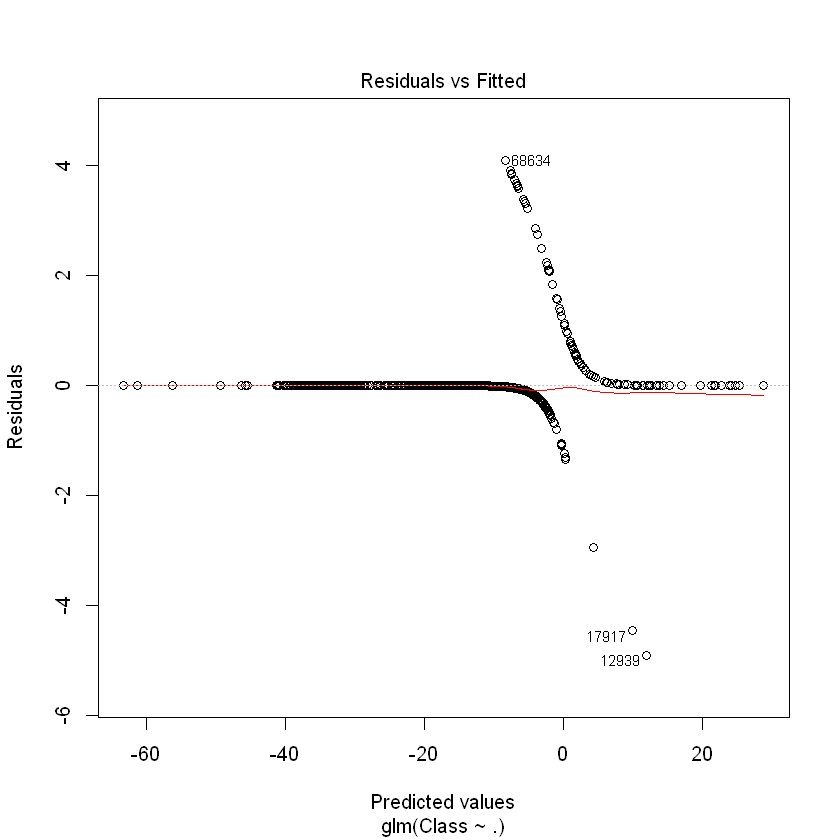

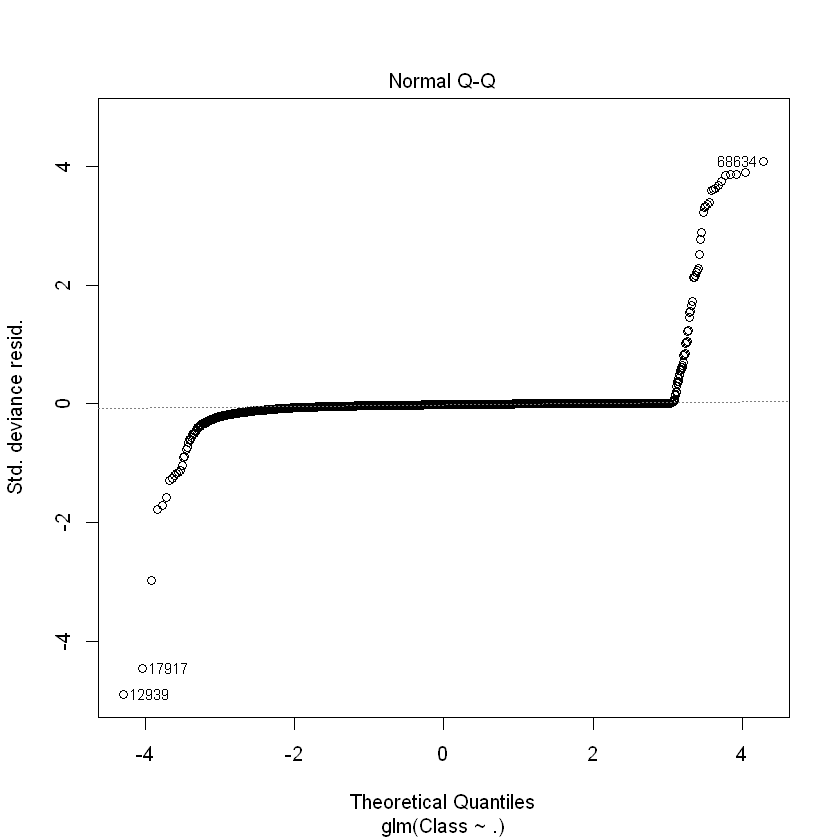

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

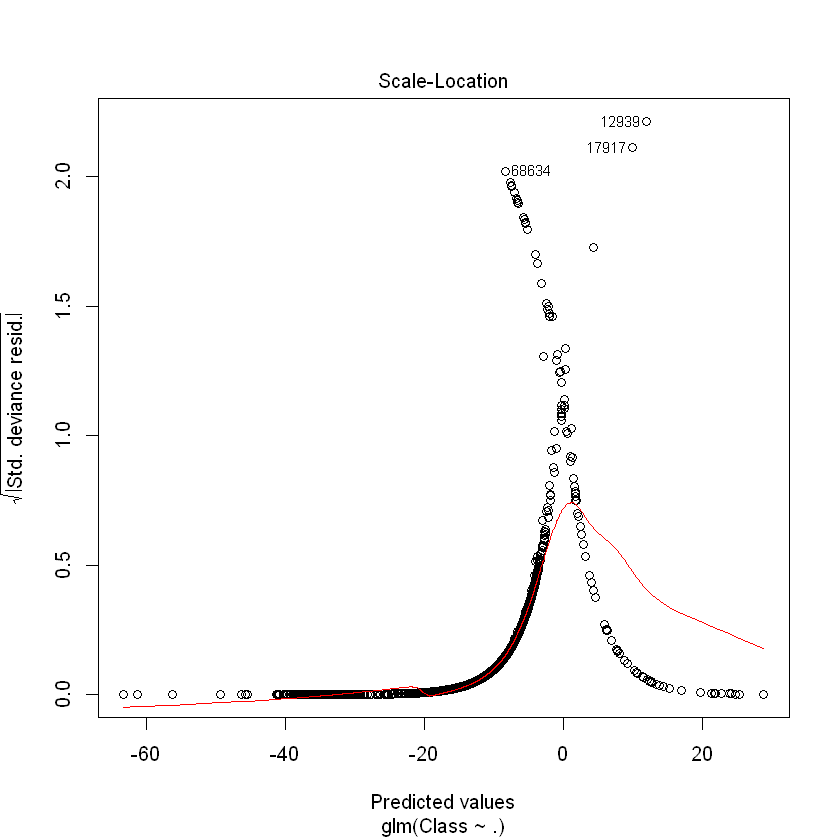

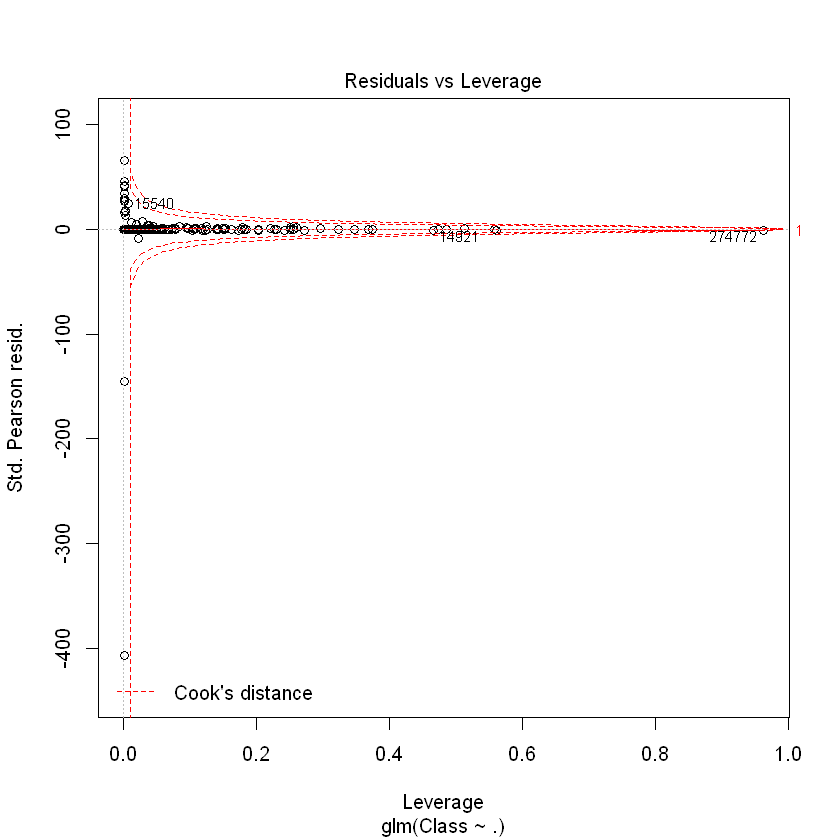

In [11]:
plot(Logistic_Model)

In order to assess the performance of our model, we will delineate the ROC curve. ROC is also known as Receiver Optimistic Characteristics. For this, we will first import the ROC package and then plot our ROC curve to analyze its performance.

>Untuk menilai kinerja model kami, kami akan menggambarkan kurva ROC. ROC juga dikenal sebagai Karakteristik Optimis Penerima. Untuk ini, pertama-tama kita akan mengimpor paket ROC dan kemudian memplot kurva ROC kita untuk menganalisis kinerjanya.

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



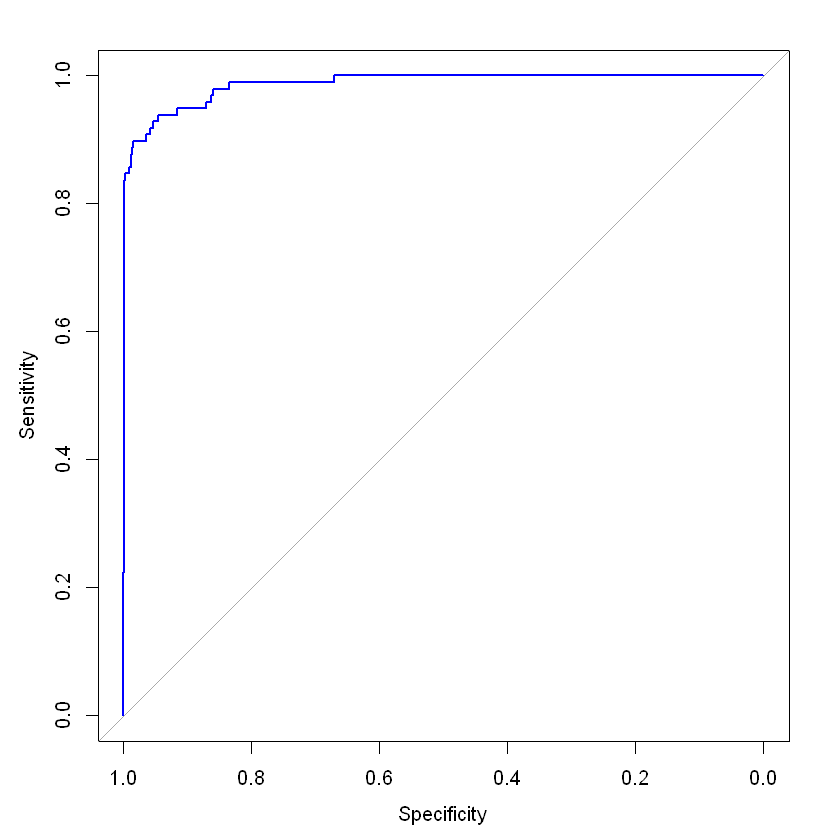

In [12]:
library(pROC)
lr.predict <- predict(Logistic_Model,test_data, probability = TRUE)
auc.gbm = roc(test_data$Class, lr.predict, plot = TRUE, col = "blue")

# 6. Fitting a Decision Tree Model

> #6. Menggunakan Decision Tree Model

In this section, we will implement a decision tree algorithm. Decision Trees to plot the outcomes of a decision. These outcomes are basically a consequence through which we can conclude as to what class the object belongs to. We will now implement our decision tree model and will plot it using the rpart.plot() function. We will specifically use the recursive parting to plot the decision tree.

> Pada bagian ini, kita akan menerapkan algoritma pohon keputusan. Pohon Keputusan untuk merencanakan hasil keputusan. Hasil-hasil ini pada dasarnya adalah konsekuensi yang melaluinya kita dapat menyimpulkan kelas apa yang dimiliki objek tersebut. Kami sekarang akan menerapkan model pohon keputusan kami dan akan memplotnya menggunakan rpart.plot () fungsi. Kami secara khusus akan menggunakan perpisahan rekursif untuk memplot pohon keputusan.

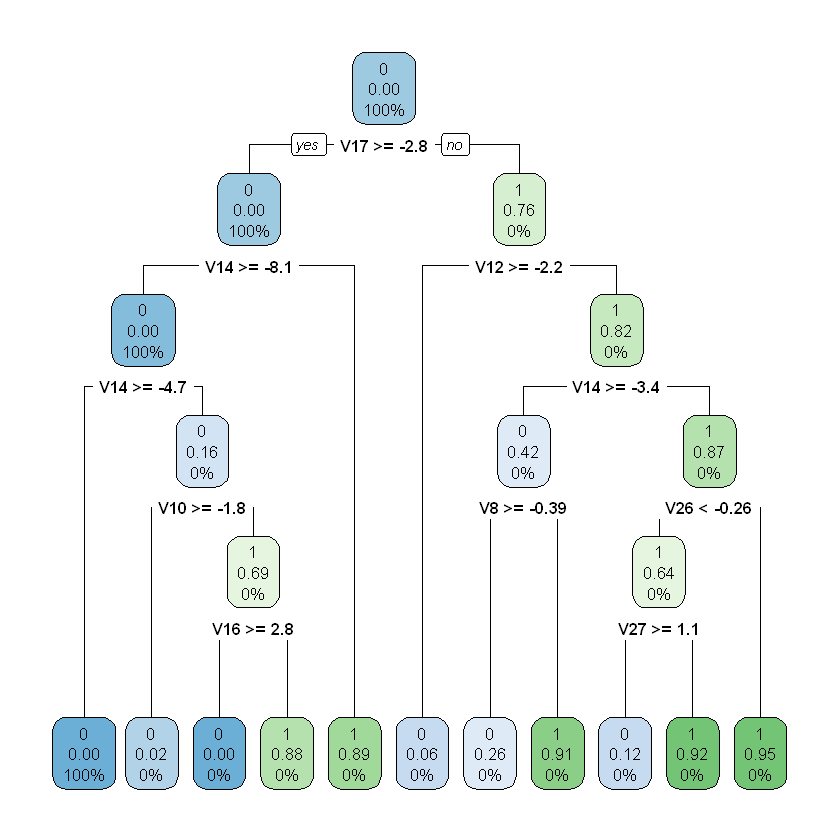

In [13]:
library(rpart)
library(rpart.plot)
decisionTree_model <- rpart(Class~., creditcard_data, method='class')
predicted_val <- predict(decisionTree_model, creditcard_data, type='class')
probability <- predict(decisionTree_model, creditcard_data, type='prob')
rpart.plot(decisionTree_model)

# 7. Artificial Neural Network

> #7. Jaringan Saraf Tiruan

Artificial Neural Networks are a type of machine learning algorithm that are modeled after the human nervous system. The ANN models are able to learn the patterns using the historical data and are able to perform classification on the input data. We import the neuralnet package that would allow us to implement our ANNs. Then we proceeded to plot it using the plot() function. Now, in the case of Artificial Neural Networks, there is a range of values that is between 1 and 0. We set a threshold as 0.5, that is, values above 0.5 will correspond to 1 and the rest will be 0. We implement this as follows

> Jaringan Saraf Tiruan adalah jenis algoritma pembelajaran mesin yang dimodelkan setelah sistem saraf manusia. Model ANN dapat mempelajari pola menggunakan data historis dan mampu melakukan klasifikasi pada data input. Kami mengimpor paket neuralnet yang memungkinkan kami mengimplementasikan ANNS kami. Kemudian kami melanjutkan untuk memplot menggunakan fungsi plot (). Sekarang, dalam kasus Jaringan Saraf Tiruan, ada rentang nilai antara 1 dan 0. Kami menetapkan ambang batas sebagai 0,5, yaitu, nilai di atas 0,5 akan sesuai dengan 1 dan sisanya akan menjadi 0. Kami menerapkan ini sebagai berikut

In [14]:
library(neuralnet)
ANN_model = neuralnet(Class~., train_data, linear.output=FALSE)
plot(ANN_model)
predANN=compute(ANN_model, test_data)
resultANN=predANN$net.result
resultANN=ifelse(resultANN>0.5,1,0)

# 8. Gradient Boosting (GBM)

> #8. Peningkatan Gradien (GBM)

Gradient Boosting is a popular machine learning algorithm that is used to perform classification and regression tasks. This model comprises of several underlying ensemble models like weak decision trees. These decision trees combine together to form a strong model of gradient boosting. We will implement gradient descent algorithm in our model as follows

> Gradient Boosting adalah algoritma pembelajaran mesin populer yang digunakan untuk melakukan tugas klasifikasi dan regresi. Model ini terdiri dari beberapa model ansambel yang mendasari seperti pohon keputusan yang lemah. Pohon keputusan ini bergabung bersama untuk membentuk model peningkatan gradien yang kuat. Kami akan menerapkan algoritma penurunan gradien dalam model kami sebagai berikut

Loaded gbm 2.1.5


   user  system elapsed 
 491.58    1.19  498.17 

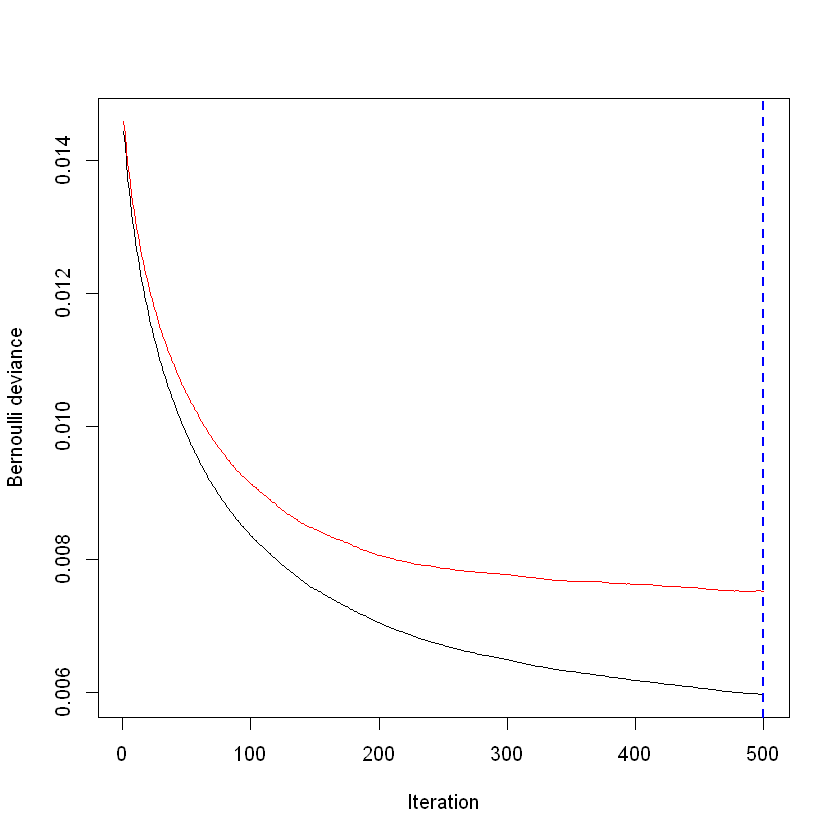

In [16]:
library(gbm, quietly=TRUE)
# Get the time to train the GBM model
system.time(
       model_gbm <- gbm(Class ~ .
               , distribution = "bernoulli"
               , data = rbind(train_data, test_data)
               , n.trees = 500
               , interaction.depth = 3
               , n.minobsinnode = 100
               , shrinkage = 0.01
               , bag.fraction = 0.5
               , train.fraction = nrow(train_data) / (nrow(train_data) + nrow(test_data))
)
)
# Determine best iteration based on test data
gbm.iter = gbm.perf(model_gbm, method = "test")

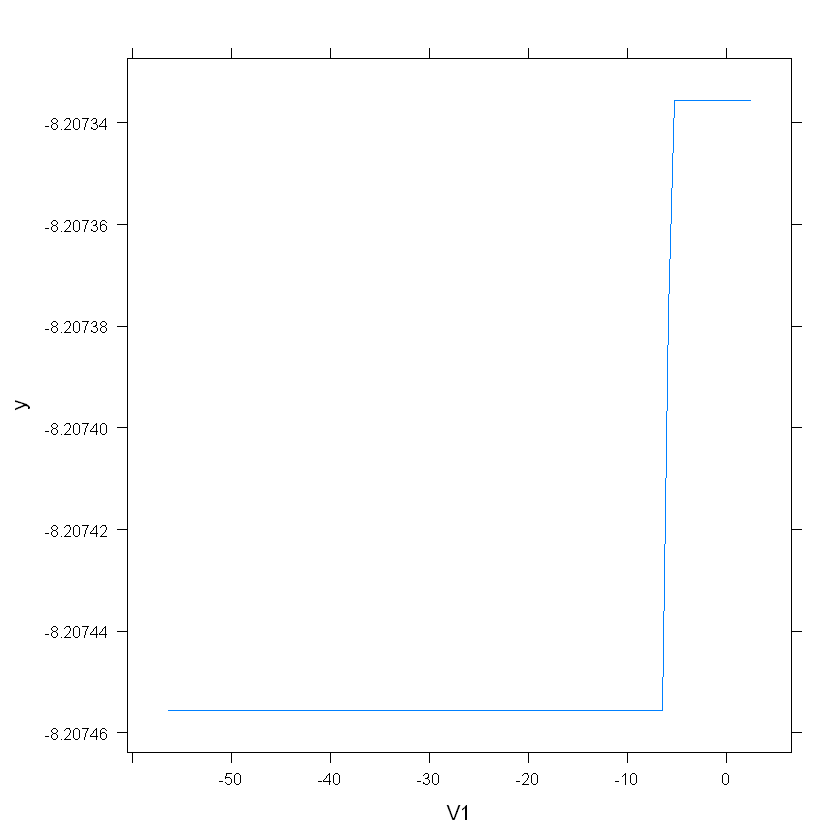

In [17]:
model.influence = relative.influence(model_gbm, n.trees = gbm.iter, sort. = TRUE)
#Plot the gbm model
plot(model_gbm)

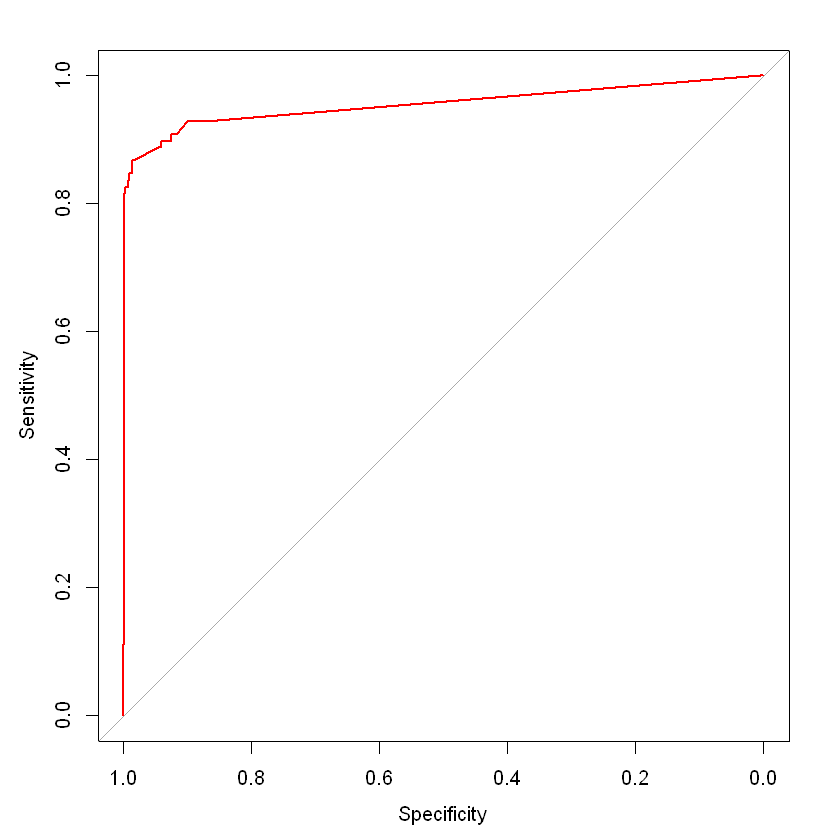

In [18]:
# Plot and calculate AUC on test data
gbm_test = predict(model_gbm, newdata = test_data, n.trees = gbm.iter)
gbm_auc = roc(test_data$Class, gbm_test, plot = TRUE, col = "red")

In [19]:
print(gbm_auc)


Call:
roc.default(response = test_data$Class, predictor = gbm_test,     plot = TRUE, col = "red")

Data: gbm_test in 56863 controls (test_data$Class 0) < 98 cases (test_data$Class 1).
Area under the curve: 0.9555


# Summary

> Ringkasan

Concluding our R Data Science project, we learnt how to develop our credit card fraud detection model using machine learning. We used a variety of ML algorithms to implement this model and also plotted the respective performance curves for the models. We learnt how data can be analyzed and visualized to discern fraudulent transactions from other types of data.

> Sebagai penutup proyek Ilmu Data R kami, kami belajar bagaimana mengembangkan model deteksi penipuan kartu kredit kami menggunakan pembelajaran mesin. Kami menggunakan berbagai algoritma ML untuk mengimplementasikan model ini dan juga memplot kurva kinerja masing-masing untuk model. Kami belajar bagaimana data dapat dianalisis dan divisualisasikan untuk membedakan transaksi penipuan dari jenis data lainnya.